In [29]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [30]:
filepath = "C:\\Users\\HP\\Desktop\\labs\\nnv_final_dmpa\\cleaned_data_1.csv"
df = pd.read_csv(filepath)

In [31]:
check_cols =['line_item_quantity', 'unit_price', 'pack_price', 'line_item_value', 'line_item_insurance', 'weight']
x_train = df[check_cols]
x_train.head()

,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,weight
0,1000,0.03,6.20,6200.0,240.117626,358
1,31920,0.07,3.99,127360.8,240.117626,1855
2,38000,0.05,3.20,121600.0,240.117626,7590
3,416,0.02,5.35,2225.6,240.117626,504
4,135,0.36,32.40,4374.0,240.117626,328


In [32]:
# Converting  numeric and handle missing values
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_train = x_train.dropna()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Isolation Forest model training
clf = IsolationForest(n_jobs=100, random_state=42, contamination=0.05)
clf.fit(x_train_scaled)

# Predict anomalies
y_pred_train = clf.predict(x_train_scaled)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
# Analysing results
print(pd.value_counts(y_pred_train))
print(x_train.loc[y_pred_train == -1, :])

 1    4271
-1     225
Name: count, dtype: int64
      line_item_quantity  unit_price  pack_price  line_item_value  \
97                   100        0.55      183.33         18333.00   
112                61021        0.20       11.89        725539.69   
169                60784        0.56       16.75       1018132.00   
198                 5900        1.68       50.40        297360.00   
243                  200        0.61      163.44         32688.00   
...                  ...         ...         ...              ...   
7646               24470        0.25       29.68        726269.60   
7708              138974        0.16        4.70        653177.80   
7724               69963        0.43       12.96        906720.48   
7772               93700        0.14        8.26        773962.00   
7773              169447        0.06        3.75        635426.25   

      line_item_insurance   weight  
97              29.330000    337.0  
112           1160.860000   6768.0  
169         

In [34]:
# from sklearn.metrics import silhouette_score
# # Calculate the Silhouette Score
# silhouette_avg = silhouette_score(x_train_scaled, y_pred_train)

# print(f"Silhouette Score: {silhouette_avg:.2f}")

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,accuracy_score
true_labels = np.where(y_pred_train == -1, 1, 0)  
predicted_labels = np.where(y_pred_train == -1, 1, 0)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Precision, Recall, F1 Score
precision = precision_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
recall = recall_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
f1 = f1_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
accuracy = accuracy_score(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[4271    0]
 [   0  225]]
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [36]:
# # Calculating the negative outlier factor (anomaly scores)
# anomaly_scores = clf.decision_function(x_train_scaled)

# # Calculating Mean Squared Error
# mse = ((anomaly_scores - np.mean(anomaly_scores))**2).mean()

# print(f"Mean Squared Error: {mse:.2f}")

# import time
# start_time = time.time()
# iso_forest = IsolationForest(contamination=0.05)
# iso_forest.fit(x_train_scaled)
# iso_forest_time = time.time() - start_time
# # Measure the start time
# start_time = time.time()
# print(f"Isolation Forest Time: {iso_forest_time:.4f} seconds")


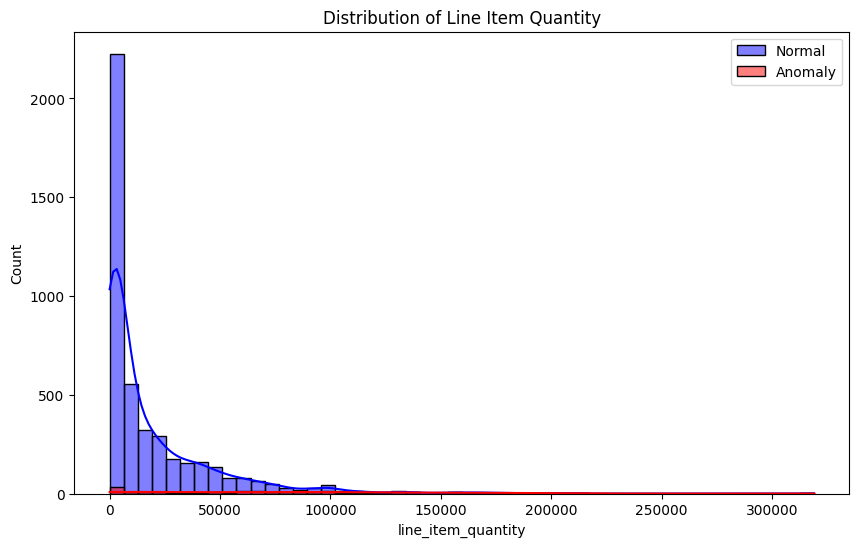

In [37]:
import seaborn as sns
# Example for line_item_quantity
plt.figure(figsize=(10, 6))
sns.histplot(x_train['line_item_quantity'], bins=50, kde=True, color='blue', label='Normal')
sns.histplot(x_train.loc[y_pred_train == -1, 'line_item_quantity'], bins=50, kde=True, color='red', label='Anomaly')
plt.title('Distribution of Line Item Quantity')
plt.legend()
plt.show()


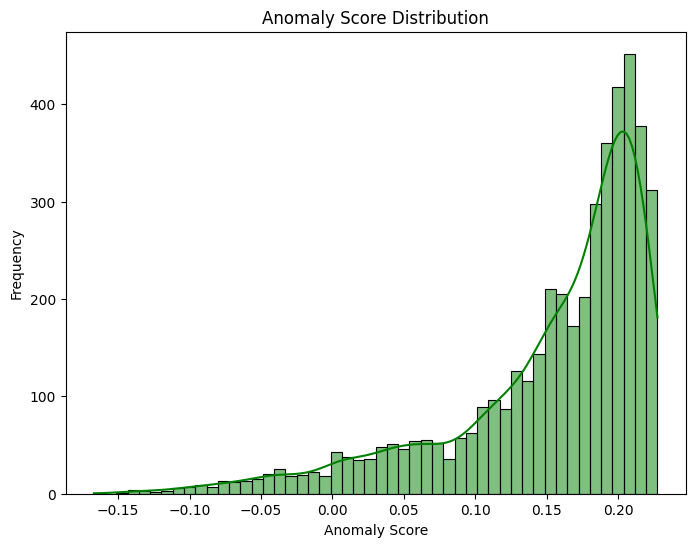

In [38]:
import seaborn as sns
# Anomaly score distribution
plt.figure(figsize=(8, 6))
sns.histplot(clf.decision_function(x_train_scaled), bins=50, kde=True, color='green')
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()



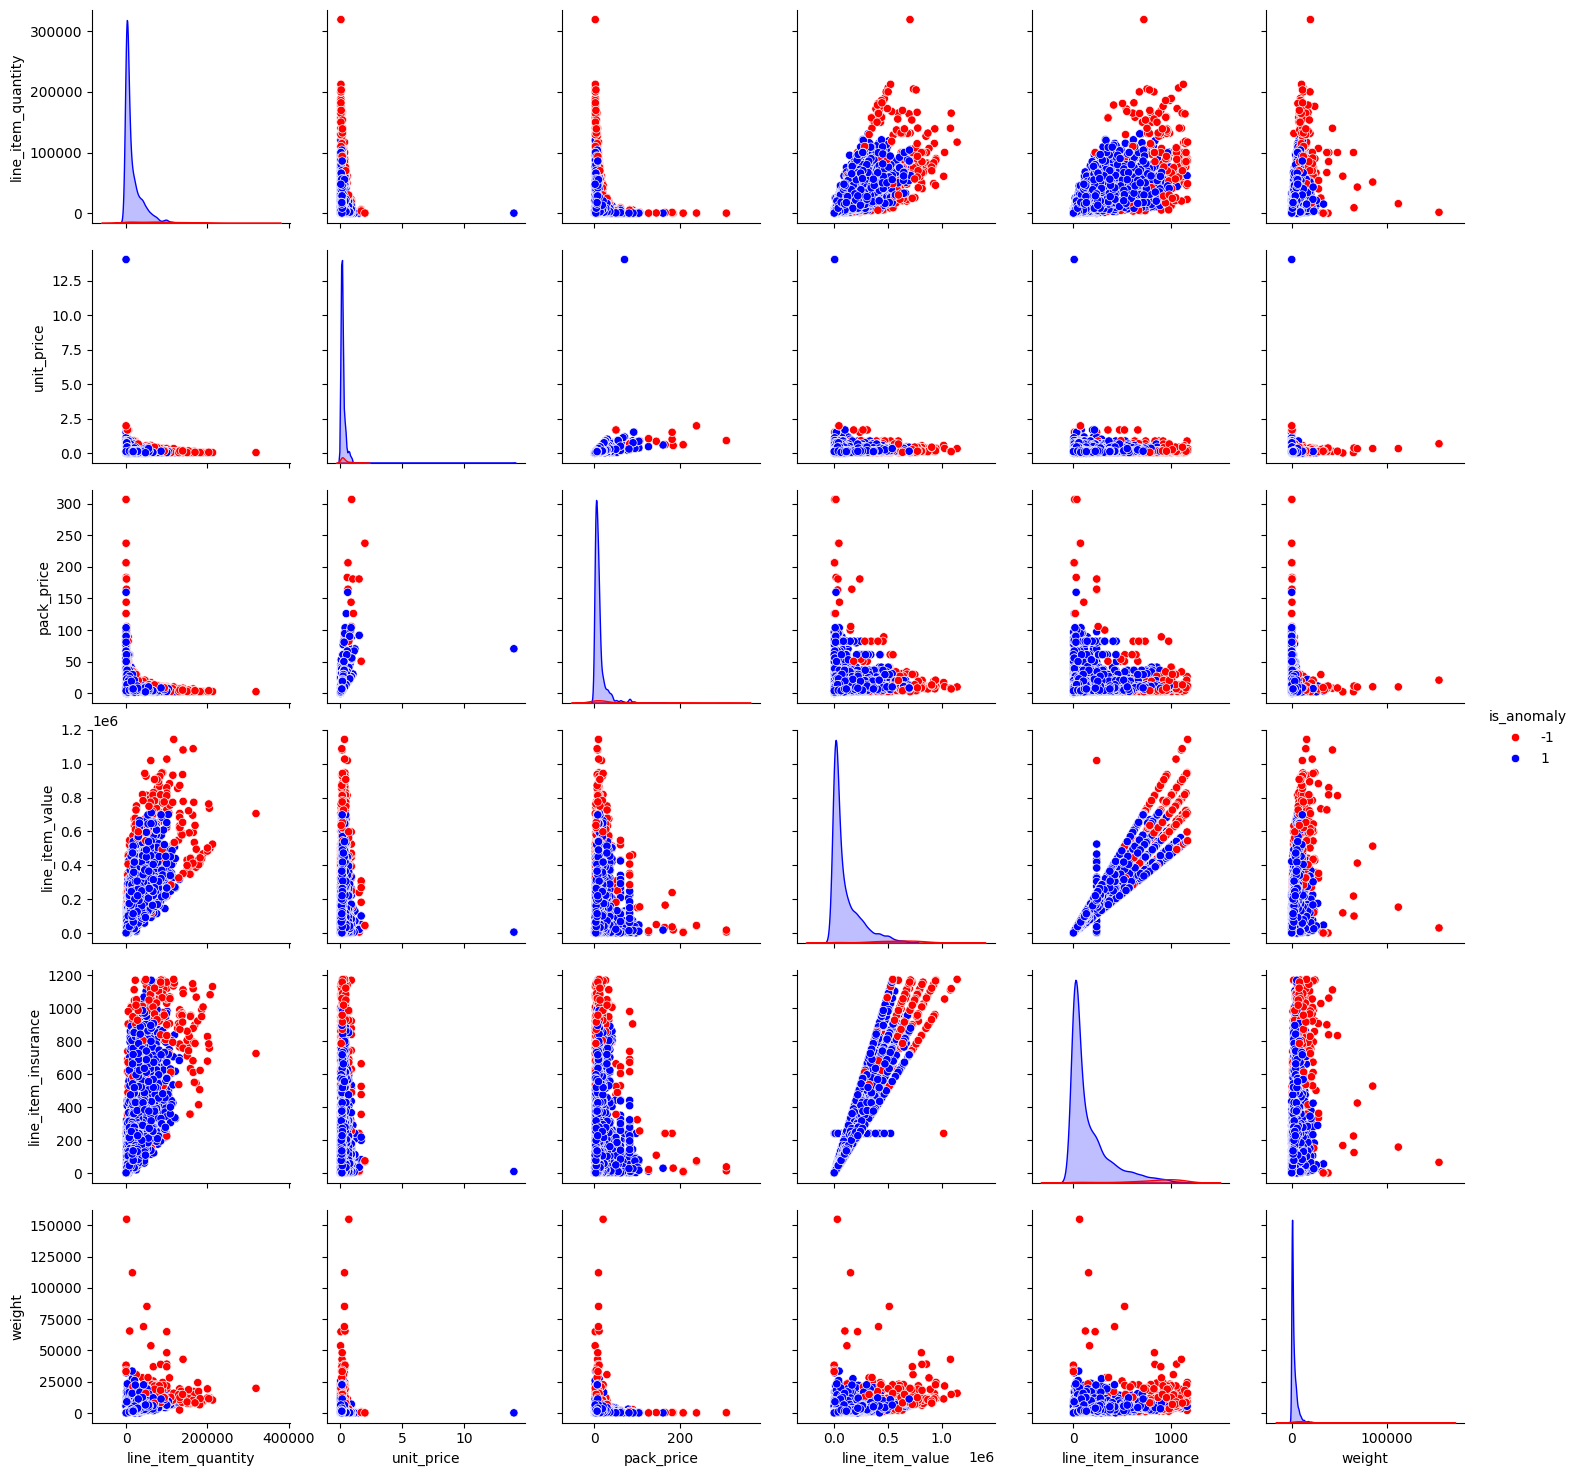

In [39]:
# Scatter plot matrix
df_visualization = x_train.copy()
df_visualization['is_anomaly'] = y_pred_train
sns.pairplot(df_visualization, hue='is_anomaly', diag_kind='kde', palette={-1: 'red', 1: 'blue'})
plt.show()
